In [1]:
#%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import requests
import sys
import matplotlib.pyplot as plt

# Google API Key
from config import gkey
pd.set_option("display.max_rows", None)

In [3]:
fastfood_us_df = pd.read_csv("fastfood_restaurant_review.csv")

In [4]:
fastfood_us_df.head()

name country   latitude  longitude  \
0  Sonic Drive-In      US  29.814697 -90.814742   
1       Taco Bell      US  35.803788 -83.580553   
2          Arby's      US  35.782339 -83.551408   
3  Steak 'n Shake      US  33.562738 -84.321143   
4         Wendy's      US  42.368823 -83.138251   

                                 Street Adress  price_level  rating  \
0        800 N Canal Blvd, Thibodaux, LA 70301          1.0     4.3   
1  206 Wears Valley Rd, Pigeon Forge, TN 37863          1.0     3.3   
2         3652 Parkway, Pigeon Forge, TN 37863          1.0     3.9   
3       2118 Mt Zion Parkway, Morrow, GA 30260          1.0     3.4   
4      9768 Grand River Ave, Detroit, MI 48204          1.0     3.6   

   user_ratings_total  
0               479.0  
1              1029.0  
2              1620.0  
3              5287.0  
4              1560.0

In [5]:
fastfood_us_df['name']=fastfood_us_df['name'].replace({"Chick-Fil-A":'Chick-fil-A'
                                          })

In [6]:
fastfood_us =fastfood_us_df.dropna()

In [7]:
#fastfood_us_df.to_csv('fastfood_restaurant_review.csv', index = False)

In [8]:
fastfood_us.head()

name country   latitude  longitude  \
0  Sonic Drive-In      US  29.814697 -90.814742   
1       Taco Bell      US  35.803788 -83.580553   
2          Arby's      US  35.782339 -83.551408   
3  Steak 'n Shake      US  33.562738 -84.321143   
4         Wendy's      US  42.368823 -83.138251   

                                 Street Adress  price_level  rating  \
0        800 N Canal Blvd, Thibodaux, LA 70301          1.0     4.3   
1  206 Wears Valley Rd, Pigeon Forge, TN 37863          1.0     3.3   
2         3652 Parkway, Pigeon Forge, TN 37863          1.0     3.9   
3       2118 Mt Zion Parkway, Morrow, GA 30260          1.0     3.4   
4      9768 Grand River Ave, Detroit, MI 48204          1.0     3.6   

   user_ratings_total  
0               479.0  
1              1029.0  
2              1620.0  
3              5287.0  
4              1560.0

In [9]:
#fastfood_us.to_csv('fastfood_restaurant_review.csv', index = False)

In [10]:
fastfood_us['name'].value_counts()

McDonald's                      1628
Taco Bell                        876
Burger King                      711
Subway                           654
Arby's                           569
Wendy's                          531
Jack in the Box                  290
Chick-fil-A                      194
Pizza Hut                        180
Domino's Pizza                   175
Dairy Queen                      172
Sonic Drive-In                   170
KFC                              155
Carl's Jr.                       108
Jimmy John's                     102
Hardee's                          96
Krystal                           68
Panera Bread                      63
Culver's                          63
Dunkin' Donuts                    59
Del Taco                          55
Steak 'n Shake                    49
SUBWAY                            49
In-N-Out Burger                   47
Taco John's                       44
Panda Express                     43
Long John Silver's                43
W

In [11]:
threshold = 16 # Anything that occurs less than this will be removed.
value_counts = fastfood_us['name'].value_counts() # Entire DataFrame 
to_remove = value_counts[value_counts <=threshold].index
fastfood_us.replace(to_remove, np.nan, inplace=True)

fastfood_us=fastfood_us.dropna()

fastfood_us['name'].value_counts()

McDonald's                1628
Taco Bell                  876
Burger King                711
Subway                     654
Arby's                     569
Wendy's                    531
Jack in the Box            290
Chick-fil-A                194
Pizza Hut                  180
Domino's Pizza             175
Dairy Queen                172
Sonic Drive-In             170
KFC                        155
Carl's Jr.                 108
Jimmy John's               102
Hardee's                    96
Krystal                     68
Culver's                    63
Panera Bread                63
Dunkin' Donuts              59
Del Taco                    55
SUBWAY                      49
Steak 'n Shake              49
In-N-Out Burger             47
Taco John's                 44
Panda Express               43
Long John Silver's          43
Whataburger                 36
Checkers                    36
Waffle House                35
Boston Market               33
Chipotle Mexican Grill      33
Bojangle

In [12]:
fastfood_us.head()

name country   latitude  longitude  \
0  Sonic Drive-In      US  29.814697 -90.814742   
1       Taco Bell      US  35.803788 -83.580553   
2          Arby's      US  35.782339 -83.551408   
3  Steak 'n Shake      US  33.562738 -84.321143   
4         Wendy's      US  42.368823 -83.138251   

                                 Street Adress  price_level  rating  \
0        800 N Canal Blvd, Thibodaux, LA 70301          1.0     4.3   
1  206 Wears Valley Rd, Pigeon Forge, TN 37863          1.0     3.3   
2         3652 Parkway, Pigeon Forge, TN 37863          1.0     3.9   
3       2118 Mt Zion Parkway, Morrow, GA 30260          1.0     3.4   
4      9768 Grand River Ave, Detroit, MI 48204          1.0     3.6   

   user_ratings_total  
0               479.0  
1              1029.0  
2              1620.0  
3              5287.0  
4              1560.0

In [13]:
fastfood_counts = fastfood_us['name'].value_counts()

In [14]:
fastfood_US_counts = fastfood_counts.rename_axis("Restaurant_Name")

In [15]:
fastfood_US_counts = fastfood_US_counts.reset_index(name="Count")

In [16]:
fastfood_US_counts=fastfood_US_counts.head(25)
fastfood_US_counts

Restaurant_Name  Count
0        McDonald's   1628
1         Taco Bell    876
2       Burger King    711
3            Subway    654
4            Arby's    569
5           Wendy's    531
6   Jack in the Box    290
7       Chick-fil-A    194
8         Pizza Hut    180
9    Domino's Pizza    175
10      Dairy Queen    172
11   Sonic Drive-In    170
12              KFC    155
13       Carl's Jr.    108
14     Jimmy John's    102
15         Hardee's     96
16          Krystal     68
17         Culver's     63
18     Panera Bread     63
19   Dunkin' Donuts     59
20         Del Taco     55
21           SUBWAY     49
22   Steak 'n Shake     49
23  In-N-Out Burger     47
24      Taco John's     44

In [17]:
x_axis = np.arange(len(fastfood_US_counts))
tick_locations = [value for value in x_axis]

tick_locations

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

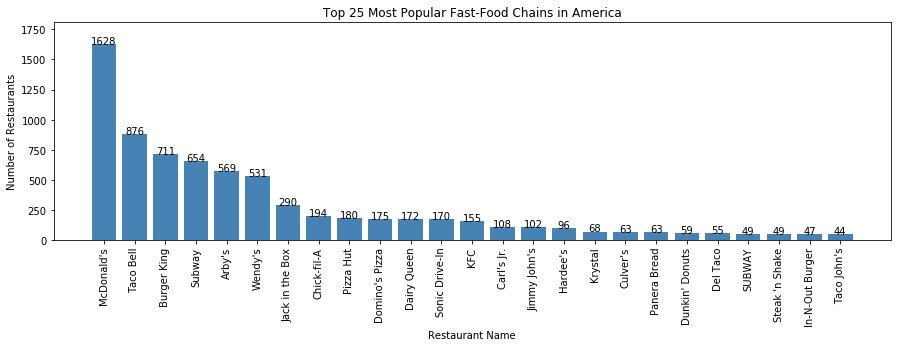

In [18]:
#%matplotlib notebook
y_axis =fastfood_US_counts["Count"]
        
plt.figure(figsize=(15,4))
plt.bar(x_axis, y_axis, color='steelblue', align="center")
plt.xticks(tick_locations,fastfood_US_counts["Restaurant_Name"], rotation = "vertical")
plt.title('Top 25 Most Popular Fast-Food Chains in America')
plt.ylabel('Number of Restaurants')
plt.xlabel("Restaurant Name")
plt.ylim((0,1810))

for i in range(len(x_axis)):
    plt.text(i,y_axis[i],y_axis[i],ha="center")
    
plt.show()

In [28]:
us_fastfood = pd.read_csv("US_fastfood_restaurant_review.csv")
us_fastfood

name country   latitude   longitude  \
0             Sonic Drive-In      US  29.814697  -90.814742   
1                  Taco Bell      US  35.803788  -83.580553   
2                     Arby's      US  35.782339  -83.551408   
3             Steak 'n Shake      US  33.562738  -84.321143   
4                    Wendy's      US  42.368823  -83.138251   
5                Burger King      US  42.416819  -83.180444   
6     Chipotle Mexican Grill      US  33.205722 -117.288645   
7                Dairy Queen      US  32.366020  -96.103364   
8                Dairy Queen      US  29.570079  -95.568166   
9                 Carl's Jr.      US  34.133291 -117.924566   
10                  Checkers      US  33.026572  -80.169733   
11                   Rally's      US  41.627298  -83.502436   
12                   Rally's      US  32.282328  -90.116770   
13                  Checkers      US  42.911470  -85.568120   
14                   Rally's      US  39.523704  -85.743659   
15                  Checkers      US  40.685506  -73.914457   
16                  Checkers      US  33.475292  -81.995946   
17                  Checkers      US  42.400037  -83.215740   
18                McDonald's      US  42.797920  -73.924364   
19                McDonald's      US  41.967079  -73.988583   
20                McDonald's      US  40.757558  -73.981671   
21                McDonald's      US  40.709646  -73.591453   
22                McDonald's      US  40.780233  -73.559340   
23                McDonald's      US  42.716812  -73.809319   
24                McDonald's      US  42.741061  -73.913673   
25                McDonald's      US  42.857899  -78.825089   
26                McDonald's      US  43.021019  -78.878167   
27                McDonald's      US  42.503903  -71.132748   
28                McDonald's      US  42.125526  -71.645913   
29                McDonald's      US  42.557448  -71.181499   
30                McDonald's      US  42.055826  -71.873999   
31                McDonald's      US  42.376247  -71.241667   
32                McDonald's      US  42.650503  -71.662674   
33                McDonald's      US  42.157222  -71.243549   
34                McDonald's      US  41.888960  -71.120789   
35                McDonald's      US  42.121930  -72.584242   
36                McDonald's      US  42.111552  -72.603359   
37                McDonald's      US  42.095053  -72.512539   
38                McDonald's      US  42.142989  -72.489230   
39                McDonald's      US  42.233410  -72.012516   
40                 Taco Bell      US  33.007329  -96.554127   
41                 Taco Bell      US  32.274786  -95.306757   
42               Burger King      US  38.964944  -92.336364   
43                   Wendy's      US  32.070343  -81.101032   
44                   Wendy's      US  33.951110  -84.518962   
45                   Wendy's      US  33.446887  -84.138326   
46                   Wendy's      US  33.792748  -83.731443   
47                   Wendy's      US  33.486344  -82.133510   
48                   Wendy's      US  33.108582  -83.254192   
49                   Wendy's      US  33.880381  -83.939657   
50                   Wendy's      US  33.839726  -83.905798   
51                   Wendy's      US  33.699522  -84.172740   
52               Burger King      US  42.547923  -70.942014   
53                McDonald's      US  41.157059  -81.219054   
54             Boston Market      US  32.679467  -97.195027   
55               Burger King      US  32.739923 -116.942156   
56             Boston Market      US  32.808270 -116.971370   
57               Burger King      US  32.805945 -116.971542   
58                Carl's Jr.      US  34.091528 -117.436370   
59               Burger King      US  33.051949 -117.260994   
60                Carl's Jr.      US  33.935276 -118.123895   
61                Carl's Jr.      US  33.916846 -118.133758   
62               Burger King      US  29.880810  -95.68